In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hiringdf = pd.read_csv("aggregate_job_postings_US.csv")
hiringdf.head()

,date,jobcountry,pct_chng_feb_1,variable
0,2020-02-01,US,0.00,total postings
1,2020-02-01,US,0.00,new postings
2,2020-02-02,US,0.01,total postings
3,2020-02-02,US,0.84,new postings
4,2020-02-03,US,0.20,total postings


In [3]:
hiringdf['date'] = pd.to_datetime(hiringdf['date'])
hiringdf = hiringdf[hiringdf['variable'] == 'total postings']
hiringdf = hiringdf[['date', 'pct_chng_feb_1']]

In [4]:
hiringdf.tail()

,date,pct_chng_feb_1
872,2021-04-12,18.01
874,2021-04-13,18.15
876,2021-04-14,18.48
878,2021-04-15,18.84
880,2021-04-16,19.13


In [5]:
import datetime as dt

In [6]:
tempd1 = dt.datetime(2021, 2, 10)
tempd2 = dt.datetime(2021, 4, 16)

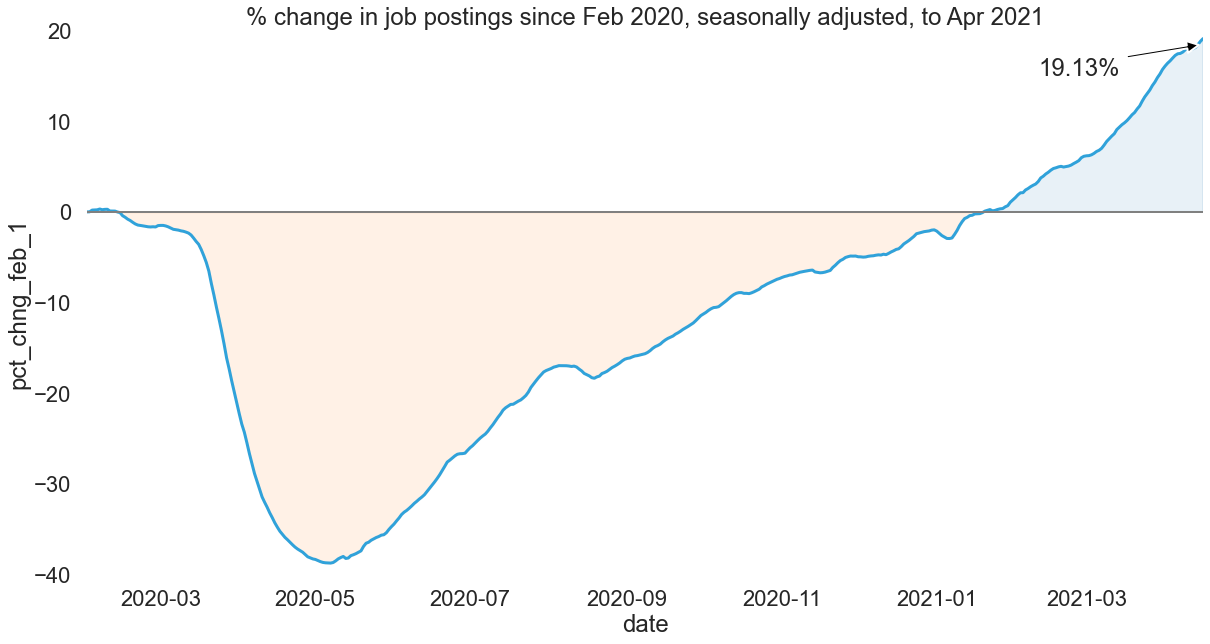

In [16]:
#plt.style.use('fivethirtyeight')

sns.set_style("white")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='pct_chng_feb_1', data=hiringdf, color='#30a2da')

plt.title('% change in job postings since Feb 2020, seasonally adjusted, to Apr 2021')
plt.axhline(0, color='0.5', linewidth=2)
plt.fill_between('date','pct_chng_feb_1', 0, where=(hiringdf['pct_chng_feb_1'] < 0), color='C1', alpha=0.1, data=hiringdf)
plt.fill_between('date','pct_chng_feb_1', 0, where=(hiringdf['pct_chng_feb_1'] > 0), color='C0', alpha=0.1, data=hiringdf)

ax.annotate('19.13%', xy=(tempd2, 18.5), xytext=(tempd1, 15),
            arrowprops=dict(width=3,facecolor='black',shrink=0.05))

sns.despine(left=True, bottom=True)
plt.axis(['2020-02-01', '2021-04-16', -40, 20])
#plt.show()
plt.savefig('hiringplot.svg')